In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/egypt-e-commerce-transactions-data/E-commerce_data.xlsx


In [2]:
customers_df = pd.read_excel('/kaggle/input/egypt-e-commerce-transactions-data/E-commerce_data.xlsx', sheet_name='customers')
branches_df = pd.read_excel('/kaggle/input/egypt-e-commerce-transactions-data/E-commerce_data.xlsx', sheet_name = 'branches')
cities_df = pd.read_excel('/kaggle/input/egypt-e-commerce-transactions-data/E-commerce_data.xlsx', sheet_name = 'cities')
gender_df = pd.read_excel('/kaggle/input/egypt-e-commerce-transactions-data/E-commerce_data.xlsx', sheet_name = 'genders')
merchants_df = pd.read_excel('/kaggle/input/egypt-e-commerce-transactions-data/E-commerce_data.xlsx', sheet_name = 'merchants')
transactions_df = pd.read_excel('/kaggle/input/egypt-e-commerce-transactions-data/E-commerce_data.xlsx', sheet_name = 'transactions')

In [3]:
transactions_df

,transaction_id,customer_id,transaction_date,transaction_status,coupon_name,burn_date,branch_id
0,1,733,2024-05-11,subscribed,uNY-568,NaT,7
1,2,631,2023-05-15,burned,kBx-219,2023-06-04,5
2,3,309,2022-11-13,subscribed,PLG-122,NaT,7
3,4,695,2024-01-26,subscribed,Wzf-897,NaT,2
4,5,288,2022-10-12,burned,qGb-428,2022-11-20,6
...,...,...,...,...,...,...,...
4995,4996,776,2024-03-20,subscribed,OSq-518,NaT,1
4996,4997,583,2024-06-27,subscribed,FsJ-607,NaT,2
4997,4998,504,2022-11-08,burned,WcY-330,2022-12-06,2
4998,4999,876,2024-05-05,burned,bgx-731,2024-07-29,7


In [4]:
merged_df = transactions_df.merge(customers_df, on='customer_id', how='left')
merged_df

,transaction_id,customer_id,transaction_date,transaction_status,coupon_name,burn_date,branch_id,join_date,city_id,gender_id
0,1,733,2024-05-11,subscribed,uNY-568,NaT,7,2023-05-16,15,2
1,2,631,2023-05-15,burned,kBx-219,2023-06-04,5,2022-10-10,14,2
2,3,309,2022-11-13,subscribed,PLG-122,NaT,7,2022-05-30,2,1
3,4,695,2024-01-26,subscribed,Wzf-897,NaT,2,2023-11-27,15,2
4,5,288,2022-10-12,burned,qGb-428,2022-11-20,6,2021-09-04,14,1
...,...,...,...,...,...,...,...,...,...,...
4995,4996,776,2024-03-20,subscribed,OSq-518,NaT,1,2022-01-08,12,1
4996,4997,583,2024-06-27,subscribed,FsJ-607,NaT,2,2023-08-03,5,2
4997,4998,504,2022-11-08,burned,WcY-330,2022-12-06,2,2022-03-12,10,2
4998,4999,876,2024-05-05,burned,bgx-731,2024-07-29,7,2022-11-19,5,2


In [5]:
merged_df=merged_df.merge(cities_df, on='city_id', how='left')
merged_df

,transaction_id,customer_id,transaction_date,transaction_status,coupon_name,burn_date,branch_id,join_date,city_id,gender_id,city_name
0,1,733,2024-05-11,subscribed,uNY-568,NaT,7,2023-05-16,15,2,Aswan
1,2,631,2023-05-15,burned,kBx-219,2023-06-04,5,2022-10-10,14,2,Damietta
2,3,309,2022-11-13,subscribed,PLG-122,NaT,7,2022-05-30,2,1,Alexandria
3,4,695,2024-01-26,subscribed,Wzf-897,NaT,2,2023-11-27,15,2,Aswan
4,5,288,2022-10-12,burned,qGb-428,2022-11-20,6,2021-09-04,14,1,Damietta
...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,776,2024-03-20,subscribed,OSq-518,NaT,1,2022-01-08,12,1,Fayyum
4996,4997,583,2024-06-27,subscribed,FsJ-607,NaT,2,2023-08-03,5,2,Port Said
4997,4998,504,2022-11-08,burned,WcY-330,2022-12-06,2,2022-03-12,10,2,Asyut
4998,4999,876,2024-05-05,burned,bgx-731,2024-07-29,7,2022-11-19,5,2,Port Said


In [6]:
merged_df=merged_df.merge(gender_df, on='gender_id', how='left')
merged_df

,transaction_id,customer_id,transaction_date,transaction_status,coupon_name,burn_date,branch_id,join_date,city_id,gender_id,city_name,gender_name
0,1,733,2024-05-11,subscribed,uNY-568,NaT,7,2023-05-16,15,2,Aswan,Female
1,2,631,2023-05-15,burned,kBx-219,2023-06-04,5,2022-10-10,14,2,Damietta,Female
2,3,309,2022-11-13,subscribed,PLG-122,NaT,7,2022-05-30,2,1,Alexandria,Male
3,4,695,2024-01-26,subscribed,Wzf-897,NaT,2,2023-11-27,15,2,Aswan,Female
4,5,288,2022-10-12,burned,qGb-428,2022-11-20,6,2021-09-04,14,1,Damietta,Male
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,776,2024-03-20,subscribed,OSq-518,NaT,1,2022-01-08,12,1,Fayyum,Male
4996,4997,583,2024-06-27,subscribed,FsJ-607,NaT,2,2023-08-03,5,2,Port Said,Female
4997,4998,504,2022-11-08,burned,WcY-330,2022-12-06,2,2022-03-12,10,2,Asyut,Female
4998,4999,876,2024-05-05,burned,bgx-731,2024-07-29,7,2022-11-19,5,2,Port Said,Female


In [7]:
merged_df=merged_df.merge(branches_df, on='branch_id', how='left')
merged_df

,transaction_id,customer_id,transaction_date,transaction_status,coupon_name,burn_date,branch_id,join_date,city_id,gender_id,city_name,gender_name,merchant_id
0,1,733,2024-05-11,subscribed,uNY-568,NaT,7,2023-05-16,15,2,Aswan,Female,7
1,2,631,2023-05-15,burned,kBx-219,2023-06-04,5,2022-10-10,14,2,Damietta,Female,9
2,3,309,2022-11-13,subscribed,PLG-122,NaT,7,2022-05-30,2,1,Alexandria,Male,7
3,4,695,2024-01-26,subscribed,Wzf-897,NaT,2,2023-11-27,15,2,Aswan,Female,18
4,5,288,2022-10-12,burned,qGb-428,2022-11-20,6,2021-09-04,14,1,Damietta,Male,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,776,2024-03-20,subscribed,OSq-518,NaT,1,2022-01-08,12,1,Fayyum,Male,11
4996,4997,583,2024-06-27,subscribed,FsJ-607,NaT,2,2023-08-03,5,2,Port Said,Female,18
4997,4998,504,2022-11-08,burned,WcY-330,2022-12-06,2,2022-03-12,10,2,Asyut,Female,18
4998,4999,876,2024-05-05,burned,bgx-731,2024-07-29,7,2022-11-19,5,2,Port Said,Female,7


In [8]:
merged_df=merged_df.merge(merchants_df, on='merchant_id', how='left')
merged_df

,transaction_id,customer_id,transaction_date,transaction_status,coupon_name,burn_date,branch_id,join_date,city_id,gender_id,city_name,gender_name,merchant_id,merchant_name
0,1,733,2024-05-11,subscribed,uNY-568,NaT,7,2023-05-16,15,2,Aswan,Female,7,Berry-Anderson
1,2,631,2023-05-15,burned,kBx-219,2023-06-04,5,2022-10-10,14,2,Damietta,Female,9,"Campbell, Shaffer and Martinez"
2,3,309,2022-11-13,subscribed,PLG-122,NaT,7,2022-05-30,2,1,Alexandria,Male,7,Berry-Anderson
3,4,695,2024-01-26,subscribed,Wzf-897,NaT,2,2023-11-27,15,2,Aswan,Female,18,Lewis LLC
4,5,288,2022-10-12,burned,qGb-428,2022-11-20,6,2021-09-04,14,1,Damietta,Male,15,Butler-Gomez
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,776,2024-03-20,subscribed,OSq-518,NaT,1,2022-01-08,12,1,Fayyum,Male,11,"Smith, Lawson and Hernandez"
4996,4997,583,2024-06-27,subscribed,FsJ-607,NaT,2,2023-08-03,5,2,Port Said,Female,18,Lewis LLC
4997,4998,504,2022-11-08,burned,WcY-330,2022-12-06,2,2022-03-12,10,2,Asyut,Female,18,Lewis LLC
4998,4999,876,2024-05-05,burned,bgx-731,2024-07-29,7,2022-11-19,5,2,Port Said,Female,7,Berry-Anderson


# Data Cleaning
- missing values
- inconsistent user input/ date format
- incorrect data types
- outliers
- duplicates
- noisy columns

In [9]:
merged_df.describe()

,transaction_id,customer_id,transaction_date,burn_date,branch_id,join_date,city_id,gender_id,merchant_id
count,5000.000000,5000.000000,5000,2516,5000.000000,5000,5000.000000,5000.00000,5000.000000
mean,2500.500000,509.551600,2023-10-22 04:38:47.040000,2023-12-01 20:39:06.581876224,5.529800,2023-01-18 14:41:34.080000,10.091800,1.48660,12.882600
min,1.000000,1.000000,2021-08-05 00:00:00,2021-08-14 00:00:00,1.000000,2021-07-18 00:00:00,1.000000,1.00000,7.000000
25%,1250.750000,262.000000,2023-05-31 18:00:00,2023-07-12 00:00:00,3.000000,2022-04-10 00:00:00,5.000000,1.00000,9.000000
50%,2500.500000,514.000000,2024-01-02 00:00:00,2024-02-11 00:00:00,6.000000,2023-01-11 00:00:00,10.000000,1.00000,13.000000
75%,3750.250000,758.000000,2024-05-08 00:00:00,2024-06-18 00:00:00,8.000000,2023-10-25 00:00:00,15.000000,2.00000,15.000000
max,5000.000000,1000.000000,2024-07-14 00:00:00,2024-10-08 00:00:00,10.000000,2024-07-13 00:00:00,20.000000,2.00000,20.000000
std,1443.520003,287.065172,NaN,NaN,2.895788,NaN,5.860703,0.49987,4.000452


### All numerical features are IDs

In [10]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   transaction_id      5000 non-null   int64         
 1   customer_id         5000 non-null   int64         
 2   transaction_date    5000 non-null   datetime64[ns]
 3   transaction_status  5000 non-null   object        
 4   coupon_name         5000 non-null   object        
 5   burn_date           2516 non-null   datetime64[ns]
 6   branch_id           5000 non-null   int64         
 7   join_date           5000 non-null   datetime64[ns]
 8   city_id             5000 non-null   int64         
 9   gender_id           5000 non-null   int64         
 10  city_name           5000 non-null   object        
 11  gender_name         5000 non-null   object        
 12  merchant_id         5000 non-null   int64         
 13  merchant_name       5000 non-null   object      

### No incorrecct dtypes

### Duplicates
No duplicates

In [11]:
merged_df.duplicated().sum()

0

# incorrect date format
- all of date columns has the same date format for each row which is %Y-%m-%d (10 characters length) so no problem
- burn_date has 2 values 10(same as the other 2 date columns) and 3 as it currently has NaT values that needs to be handled

In [12]:
for col in merged_df.select_dtypes('datetime64[ns]'):
    date_lengths = merged_df[col].astype(str).str.len()
    print(date_lengths.value_counts(), end = '\n------------------------------------------\n')

transaction_date
10    5000
Name: count, dtype: int64
------------------------------------------
burn_date
10    2516
3     2484
Name: count, dtype: int64
------------------------------------------
join_date
10    5000
Name: count, dtype: int64
------------------------------------------


# missing values
- all null values are in burn date column as if the coupon status is claimed so it hasn't been burnt yet so there is no burn date for it
- we can't simply drop those nulls as it form nearly 50% of the data also we would end having only customers that used their coupons and losing all info about those who still have active coupon so it should be imputed
- as there is no expiry date for the coupon we can impute those null dates with a hypothetical far date to be it's burn date to keep the coulmn as date type 

In [13]:
merged_df.isna().sum()

transaction_id           0
customer_id              0
transaction_date         0
transaction_status       0
coupon_name              0
burn_date             2484
branch_id                0
join_date                0
city_id                  0
gender_id                0
city_name                0
gender_name              0
merchant_id              0
merchant_name            0
dtype: int64

In [14]:
merged_df.loc[merged_df['burn_date'].isna(),:]

,transaction_id,customer_id,transaction_date,transaction_status,coupon_name,burn_date,branch_id,join_date,city_id,gender_id,city_name,gender_name,merchant_id,merchant_name
0,1,733,2024-05-11,subscribed,uNY-568,NaT,7,2023-05-16,15,2,Aswan,Female,7,Berry-Anderson
2,3,309,2022-11-13,subscribed,PLG-122,NaT,7,2022-05-30,2,1,Alexandria,Male,7,Berry-Anderson
3,4,695,2024-01-26,subscribed,Wzf-897,NaT,2,2023-11-27,15,2,Aswan,Female,18,Lewis LLC
5,6,307,2023-01-01,subscribed,gke-047,NaT,8,2021-12-20,2,1,Alexandria,Male,20,Griffin-Leblanc
11,12,662,2024-06-23,subscribed,Ott-996,NaT,8,2024-06-04,6,1,Suez,Male,20,Griffin-Leblanc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,4994,557,2024-02-13,subscribed,WUa-348,NaT,8,2022-08-28,11,1,Ismailia,Male,20,Griffin-Leblanc
4994,4995,962,2023-03-29,subscribed,lll-187,NaT,3,2021-10-17,15,2,Aswan,Female,8,Medina-Foster
4995,4996,776,2024-03-20,subscribed,OSq-518,NaT,1,2022-01-08,12,1,Fayyum,Male,11,"Smith, Lawson and Hernandez"
4996,4997,583,2024-06-27,subscribed,FsJ-607,NaT,2,2023-08-03,5,2,Port Said,Female,18,Lewis LLC


In [15]:
import datetime 
dt = datetime.date(2099,12,31)
merged_df = merged_df.replace(float('nan'),dt)
merged_df['burn_date'] = pd.to_datetime(merged_df['burn_date'], format = '%Y-%m-%d')

In [16]:
date_lengths = merged_df['burn_date'].astype(str).str.len()
date_lengths.value_counts()

burn_date
10    5000
Name: count, dtype: int64

In [17]:
merged_df

,transaction_id,customer_id,transaction_date,transaction_status,coupon_name,burn_date,branch_id,join_date,city_id,gender_id,city_name,gender_name,merchant_id,merchant_name
0,1,733,2024-05-11,subscribed,uNY-568,2099-12-31,7,2023-05-16,15,2,Aswan,Female,7,Berry-Anderson
1,2,631,2023-05-15,burned,kBx-219,2023-06-04,5,2022-10-10,14,2,Damietta,Female,9,"Campbell, Shaffer and Martinez"
2,3,309,2022-11-13,subscribed,PLG-122,2099-12-31,7,2022-05-30,2,1,Alexandria,Male,7,Berry-Anderson
3,4,695,2024-01-26,subscribed,Wzf-897,2099-12-31,2,2023-11-27,15,2,Aswan,Female,18,Lewis LLC
4,5,288,2022-10-12,burned,qGb-428,2022-11-20,6,2021-09-04,14,1,Damietta,Male,15,Butler-Gomez
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,776,2024-03-20,subscribed,OSq-518,2099-12-31,1,2022-01-08,12,1,Fayyum,Male,11,"Smith, Lawson and Hernandez"
4996,4997,583,2024-06-27,subscribed,FsJ-607,2099-12-31,2,2023-08-03,5,2,Port Said,Female,18,Lewis LLC
4997,4998,504,2022-11-08,burned,WcY-330,2022-12-06,2,2022-03-12,10,2,Asyut,Female,18,Lewis LLC
4998,4999,876,2024-05-05,burned,bgx-731,2024-07-29,7,2022-11-19,5,2,Port Said,Female,7,Berry-Anderson


# EDA

In [18]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Text(0, 0.5, 'City')

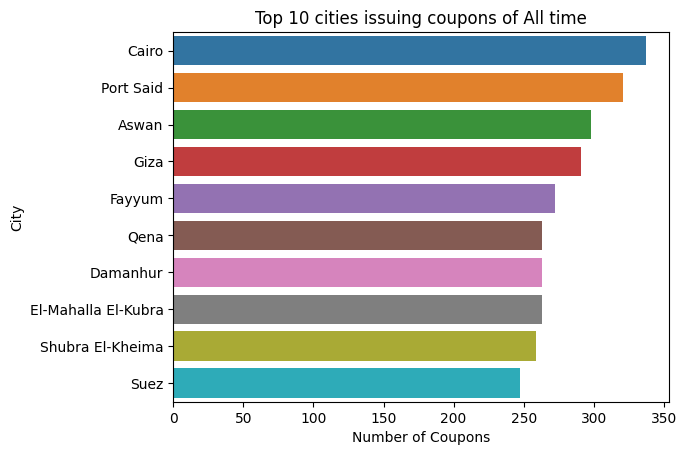

In [19]:
cities_count = merged_df['city_name'].value_counts().nlargest(10)
sns.barplot(orient = 'h', data = merged_df, x = cities_count.values, y = cities_count.index)
plt.title('Top 10 cities issuing coupons of All time')
plt.xlabel('Number of Coupons')
plt.ylabel('City')

Text(0.5, 0, 'Gender')

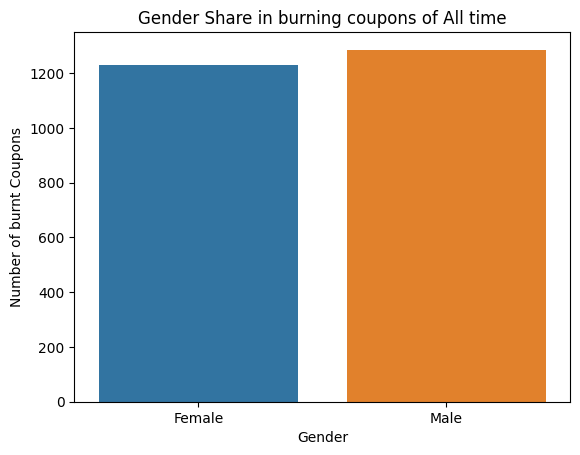

In [20]:
gender_count = merged_df.loc[merged_df['transaction_status'] == 'burned'].groupby('gender_name')['transaction_id'].count()
sns.barplot(x = gender_count.index, y = gender_count.values)
plt.title('Gender Share in burning coupons of All time')
plt.ylabel('Number of burnt Coupons')
plt.xlabel('Gender')

Text(0, 0.5, 'Merchant')

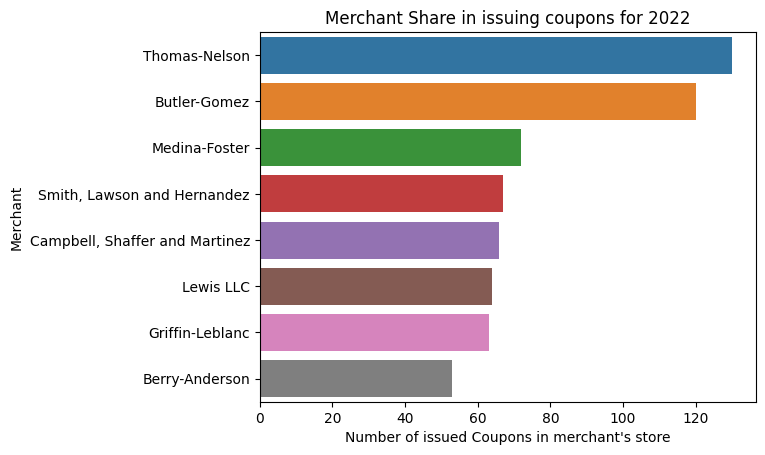

In [21]:
merchant_share = merged_df.loc[merged_df['transaction_date'].dt.year == 2022].groupby('merchant_name')['transaction_id'].count().sort_values(ascending = False)
sns.barplot(orient = 'h',y = merchant_share.index, x = merchant_share.values)
plt.title('Merchant Share in issuing coupons for 2022')
plt.xlabel('Number of issued Coupons in merchant\'s store')
plt.ylabel('Merchant')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Month')

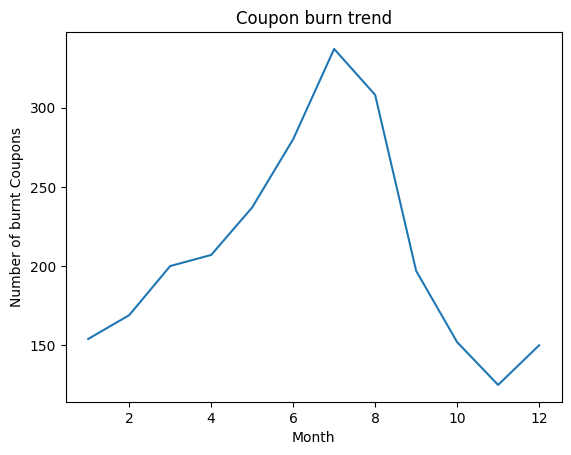

In [22]:
month = merged_df.loc[merged_df['transaction_status'] == 'burned'].groupby(merged_df['burn_date'].dt.month)['transaction_id'].count()
sns.lineplot(x= month.index, y = month.values)
plt.title('Coupon burn trend')
plt.ylabel('Number of burnt Coupons')
plt.xlabel('Month')

Text(0, 0.5, 'Number of Joined Customers')

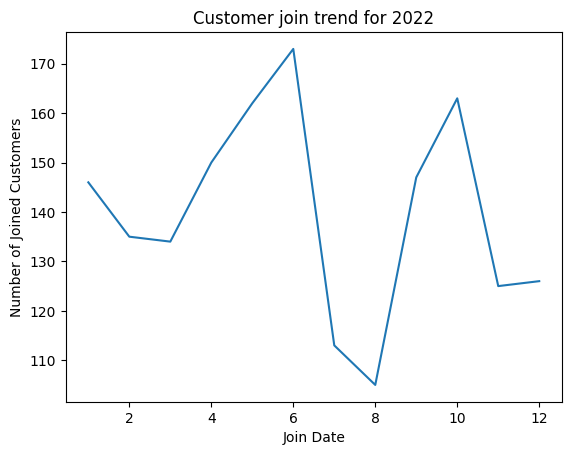

In [23]:
customer_no = merged_df.loc[merged_df['join_date'].dt.year == 2022].groupby(merged_df['join_date'].dt.month)['customer_id'].count()
customer_no.plot(kind = 'line')
plt.title('Customer join trend for 2022')
plt.xlabel('Join Date')
plt.ylabel("Number of Joined Customers")

# Date columns handling
- we need to split date columns into year,month,day columns

In [24]:
# join date column
merged_df['join_year'] = merged_df['join_date'].dt.year
merged_df['join_month'] = merged_df['join_date'].dt.month
merged_df['join_day'] = merged_df['join_date'].dt.day
# burn date column
merged_df['burn_year'] = merged_df['burn_date'].dt.year
merged_df['burn_month'] = merged_df['burn_date'].dt.month
merged_df['burn_day'] = merged_df['burn_date'].dt.day
# transaction date
merged_df['transaction_year'] = merged_df['transaction_date'].dt.year
merged_df['transaction_month'] = merged_df['transaction_date'].dt.month
merged_df['transaction_day'] = merged_df['transaction_date'].dt.day
merged_df

,transaction_id,customer_id,transaction_date,transaction_status,coupon_name,burn_date,branch_id,join_date,city_id,gender_id,...,merchant_name,join_year,join_month,join_day,burn_year,burn_month,burn_day,transaction_year,transaction_month,transaction_day
0,1,733,2024-05-11,subscribed,uNY-568,2099-12-31,7,2023-05-16,15,2,...,Berry-Anderson,2023,5,16,2099,12,31,2024,5,11
1,2,631,2023-05-15,burned,kBx-219,2023-06-04,5,2022-10-10,14,2,...,"Campbell, Shaffer and Martinez",2022,10,10,2023,6,4,2023,5,15
2,3,309,2022-11-13,subscribed,PLG-122,2099-12-31,7,2022-05-30,2,1,...,Berry-Anderson,2022,5,30,2099,12,31,2022,11,13
3,4,695,2024-01-26,subscribed,Wzf-897,2099-12-31,2,2023-11-27,15,2,...,Lewis LLC,2023,11,27,2099,12,31,2024,1,26
4,5,288,2022-10-12,burned,qGb-428,2022-11-20,6,2021-09-04,14,1,...,Butler-Gomez,2021,9,4,2022,11,20,2022,10,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,776,2024-03-20,subscribed,OSq-518,2099-12-31,1,2022-01-08,12,1,...,"Smith, Lawson and Hernandez",2022,1,8,2099,12,31,2024,3,20
4996,4997,583,2024-06-27,subscribed,FsJ-607,2099-12-31,2,2023-08-03,5,2,...,Lewis LLC,2023,8,3,2099,12,31,2024,6,27
4997,4998,504,2022-11-08,burned,WcY-330,2022-12-06,2,2022-03-12,10,2,...,Lewis LLC,2022,3,12,2022,12,6,2022,11,8
4998,4999,876,2024-05-05,burned,bgx-731,2024-07-29,7,2022-11-19,5,2,...,Berry-Anderson,2022,11,19,2024,7,29,2024,5,5


In [25]:
merged_df.drop(columns = ['transaction_date','burn_date','join_date'],inplace = True)
merged_df

,transaction_id,customer_id,transaction_status,coupon_name,branch_id,city_id,gender_id,city_name,gender_name,merchant_id,merchant_name,join_year,join_month,join_day,burn_year,burn_month,burn_day,transaction_year,transaction_month,transaction_day
0,1,733,subscribed,uNY-568,7,15,2,Aswan,Female,7,Berry-Anderson,2023,5,16,2099,12,31,2024,5,11
1,2,631,burned,kBx-219,5,14,2,Damietta,Female,9,"Campbell, Shaffer and Martinez",2022,10,10,2023,6,4,2023,5,15
2,3,309,subscribed,PLG-122,7,2,1,Alexandria,Male,7,Berry-Anderson,2022,5,30,2099,12,31,2022,11,13
3,4,695,subscribed,Wzf-897,2,15,2,Aswan,Female,18,Lewis LLC,2023,11,27,2099,12,31,2024,1,26
4,5,288,burned,qGb-428,6,14,1,Damietta,Male,15,Butler-Gomez,2021,9,4,2022,11,20,2022,10,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,776,subscribed,OSq-518,1,12,1,Fayyum,Male,11,"Smith, Lawson and Hernandez",2022,1,8,2099,12,31,2024,3,20
4996,4997,583,subscribed,FsJ-607,2,5,2,Port Said,Female,18,Lewis LLC,2023,8,3,2099,12,31,2024,6,27
4997,4998,504,burned,WcY-330,2,10,2,Asyut,Female,18,Lewis LLC,2022,3,12,2022,12,6,2022,11,8
4998,4999,876,burned,bgx-731,7,5,2,Port Said,Female,7,Berry-Anderson,2022,11,19,2024,7,29,2024,5,5


In [26]:
merged_df.columns

Index(['transaction_id', 'customer_id', 'transaction_status', 'coupon_name',
       'branch_id', 'city_id', 'gender_id', 'city_name', 'gender_name',
       'merchant_id', 'merchant_name', 'join_year', 'join_month', 'join_day',
       'burn_year', 'burn_month', 'burn_day', 'transaction_year',
       'transaction_month', 'transaction_day'],
      dtype='object')

# Unimportant columns
- gender_name: we will remove gender name and leave gender_id to be an encoded version of it
- city_name: we will remove city name and leave city_id to be an encoded version of it
- merchant_name: we will remove merchant name and leave merchant_id to be an encoded version of it


In [27]:
features = set(merged_df.columns) - {'gender_name','city_name','merchant_name'}
features = list(features)
X = merged_df[features]
for colname in X.select_dtypes('object'):
    X.loc[:,colname],_ = X.loc[:,colname].factorize()
    
X

,merchant_id,burn_month,burn_day,transaction_day,transaction_id,city_id,coupon_name,gender_id,burn_year,join_day,customer_id,branch_id,transaction_status,join_year,join_month,transaction_year,transaction_month
0,7,12,31,11,1,15,0,2,2099,16,733,7,0,2023,5,2024,5
1,9,6,4,15,2,14,1,2,2023,10,631,5,1,2022,10,2023,5
2,7,12,31,13,3,2,2,1,2099,30,309,7,0,2022,5,2022,11
3,18,12,31,26,4,15,3,2,2099,27,695,2,0,2023,11,2024,1
4,15,11,20,12,5,14,4,1,2022,4,288,6,1,2021,9,2022,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,11,12,31,20,4996,12,4995,1,2099,8,776,1,0,2022,1,2024,3
4996,18,12,31,27,4997,5,4996,2,2099,3,583,2,0,2023,8,2024,6
4997,18,12,6,8,4998,10,4997,2,2022,12,504,2,1,2022,3,2022,11
4998,7,7,29,5,4999,5,4998,2,2024,19,876,7,1,2022,11,2024,5


## Transaction id and coupon name
- in my opinion these features has no information to provide to the model as they don't have any patterns in them where each transaction has a unique id and unique coupon name so how is knowing the transaction id and name that a customer recieved and won't repeat again would make any help in segmenting customers
- so we can try clustering with/without them and see if they make any difference

In [28]:
print(merged_df['transaction_id'].nunique())
print(merged_df['coupon_name'].nunique())

5000
5000


# Feature Scaling

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.47063082,  0.79736328,  0.77560624, ..., -0.40223479,
         0.87084034, -0.30864106],
       [-0.97063734, -0.8972314 , -1.94320457, ...,  1.06964311,
        -0.47637553, -0.30864106],
       [-1.47063082,  0.79736328,  0.77560624, ..., -0.40223479,
        -1.8235914 ,  1.60759067],
       ...,
       [ 1.27933332,  0.79736328, -1.74181118, ..., -0.99098595,
        -1.8235914 ,  1.60759067],
       [-1.47063082, -0.61479895,  0.57421284, ...,  1.36401869,
         0.87084034, -0.30864106],
       [ 0.5293431 ,  0.79736328,  0.77560624, ..., -1.28536153,
        -1.8235914 ,  0.64947481]])

now, Act as an NLP Expert, give me a list of all open source LLMs that can do exact;y the same what you did where i only give them the list of symptoms and the instruction to analyze the user prompt and return a vector of 0s and 1s based on precense of the exact word of symptom or any word has the same meaning will take 1 and 0 for the abscence case
Note: i will use the model as it is , i will do any fine-tuning of any kind as i don't have dataset for this task so i need a model that will be able to do this without any fine-tuning# Clustering Techniques
- K-means
- DB Scan
- Hierarchical Clustering

## K-means

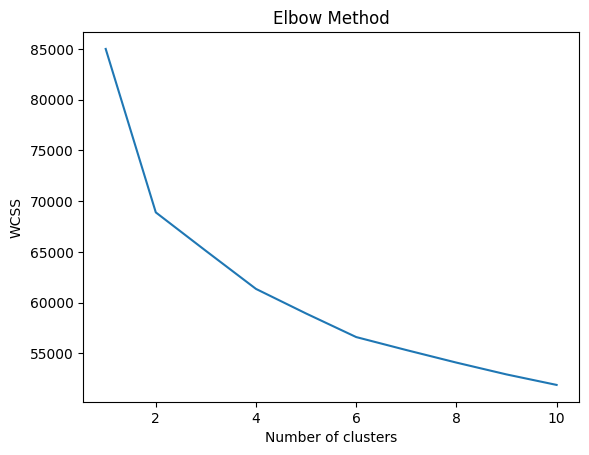

In [30]:
from sklearn.cluster import KMeans
# Elbow Method to determine that's the best no of clusters (K)
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


#### Elbow Method 
- is used to determine what number of clusters seems to be the best number to segment on, based on WCSS(with-in cluster sum of squares) score 
- WCSS measures the sum of squared distances between each data point and its assigned cluster centroid. The lower the WCSS, the better the clustering.
- The best number to choose is at the elbow of the chart, while there is no true elbow in the chart we can try [3,4] values and see which is better

## K-means Evaluation
- silhouettes score:

    The silhouette score measures how similar a point is to its own cluster compared to other clusters. It ranges from -1 to +1:
    
    1: Well-clustered point.
    
    0: Point is on the boundary of two clusters.
    
    Negative values: Point is misclassified.
    
    
- Davies_bouldin index:
This index measures the average similarity ratio of each cluster with the cluster that is most similar to it. Lower values indicate better clustering as it would mean that the similarity between clusters is low

In [31]:
# K = 2
kmeans_2 = KMeans(n_clusters=2)

# Fit the model to the data
kmeans_2.fit(X_scaled)

# Get the cluster centers (centroids)
centroids = kmeans_2.cluster_centers_

# Get the predicted clusters for each data point
y_kmeans_2 = kmeans_2.predict(X_scaled)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [32]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_scaled, kmeans_2.labels_)
print("Silhouette Score: ", score)


Silhouette Score:  0.18118986638338788


In [33]:
from sklearn.metrics import davies_bouldin_score
dbi = davies_bouldin_score(X_scaled, kmeans_2.labels_)
print("Davies-Bouldin Index: ", dbi)


Davies-Bouldin Index:  2.0469570125217333


In [34]:
# K = 3
kmeans_3 = KMeans(n_clusters=3)

# Fit the model to the data
kmeans_3.fit(X_scaled)

# Get the cluster centers (centroids)
centroids = kmeans_3.cluster_centers_

# Get the predicted clusters for each data point
y_kmeans_3 = kmeans_3.predict(X_scaled)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [35]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_scaled, kmeans_3.labels_)
print("Silhouette Score: ", score)


Silhouette Score:  0.1181438377452403


In [36]:
from sklearn.metrics import davies_bouldin_score
dbi = davies_bouldin_score(X_scaled, kmeans_3.labels_)
print("Davies-Bouldin Index: ", dbi)


Davies-Bouldin Index:  2.444712142814204


In [37]:
# K = 4
kmeans_4 = KMeans(n_clusters=4)

# Fit the model to the data
kmeans_4.fit(X_scaled)

# Get the cluster centers (centroids)
centroids = kmeans_4.cluster_centers_

# Get the predicted clusters for each data point
y_kmeans_4 = kmeans_4.predict(X_scaled)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [38]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_scaled, kmeans_4.labels_)
print("Silhouette Score: ", score)


Silhouette Score:  0.10163155738542005


In [39]:
from sklearn.metrics import davies_bouldin_score
dbi = davies_bouldin_score(X_scaled, kmeans_4.labels_)
print("Davies-Bouldin Index: ", dbi)


Davies-Bouldin Index:  2.8238049568618164


### K = 2 has the best scores for the evaluation metrics(highest silhouette score and lowest Davies-bouldin score) so we could go with it 

## K-Means with transaction_id and coupon name removed

In [40]:
features = set(merged_df.columns) - {'gender_name','city_name','merchant_name','transaction_id'}
features = list(features)


In [41]:
X2 = merged_df[features].copy()
for colname in X.select_dtypes('object'):
    X2.loc[:,colname],_ = X2.loc[:,colname].factorize()

In [42]:
X2.drop(columns = 'coupon_name',inplace = True)

In [43]:
X2

,merchant_id,burn_month,burn_day,transaction_day,city_id,gender_id,burn_year,join_day,customer_id,branch_id,transaction_status,join_year,join_month,transaction_year,transaction_month
0,7,12,31,11,15,2,2099,16,733,7,0,2023,5,2024,5
1,9,6,4,15,14,2,2023,10,631,5,1,2022,10,2023,5
2,7,12,31,13,2,1,2099,30,309,7,0,2022,5,2022,11
3,18,12,31,26,15,2,2099,27,695,2,0,2023,11,2024,1
4,15,11,20,12,14,1,2022,4,288,6,1,2021,9,2022,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,11,12,31,20,12,1,2099,8,776,1,0,2022,1,2024,3
4996,18,12,31,27,5,2,2099,3,583,2,0,2023,8,2024,6
4997,18,12,6,8,10,2,2022,12,504,2,1,2022,3,2022,11
4998,7,7,29,5,5,2,2024,19,876,7,1,2022,11,2024,5


In [44]:
X2_scaled = scaler.fit_transform(X2)
X2_scaled

array([[-1.47063082,  0.79736328,  0.77560624, ..., -0.40223479,
         0.87084034, -0.30864106],
       [-0.97063734, -0.8972314 , -1.94320457, ...,  1.06964311,
        -0.47637553, -0.30864106],
       [-1.47063082,  0.79736328,  0.77560624, ..., -0.40223479,
        -1.8235914 ,  1.60759067],
       ...,
       [ 1.27933332,  0.79736328, -1.74181118, ..., -0.99098595,
        -1.8235914 ,  1.60759067],
       [-1.47063082, -0.61479895,  0.57421284, ...,  1.36401869,
         0.87084034, -0.30864106],
       [ 0.5293431 ,  0.79736328,  0.77560624, ..., -1.28536153,
        -1.8235914 ,  0.64947481]])

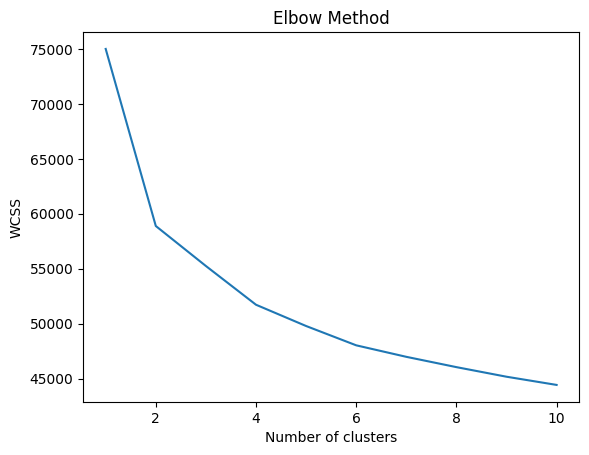

In [45]:
from sklearn.cluster import KMeans
# Elbow Method to determine that's the best no of clusters (K)
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X2_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


- We can try 2,3 and determine which is best

In [46]:
# K = 2
kmeans_2 = KMeans(n_clusters = 2)

# Fit the model to the data
kmeans_2.fit(X2_scaled)

# Get the cluster centers (centroids)
centroids = kmeans_2.cluster_centers_

# Get the predicted clusters for each data point
ymeans_2 = kmeans_2.predict(X2_scaled)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [47]:
score = silhouette_score(X2_scaled,kmeans_2.labels_)
print("Silhouette Score: ", score)


Silhouette Score:  0.20340340200749962


In [48]:
dbi = davies_bouldin_score(X2_scaled, kmeans_2.labels_)
print("Davies-Bouldin Index: ", dbi)

Davies-Bouldin Index:  1.8914972293388181


In [49]:
# K = 3
kmeans_3 = KMeans(n_clusters = 3)

# Fit the model to the data
kmeans_3.fit(X2_scaled)

# Get the cluster centers (centroids)
centroids = kmeans_3.cluster_centers_

# Get the predicted clusters for each data point
ymeans_3 = kmeans_3.predict(X2_scaled)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [50]:
score = silhouette_score(X2_scaled,kmeans_3.labels_)
print("Silhouette Score: ", score)


Silhouette Score:  0.15542644876493042


In [51]:
dbi = davies_bouldin_score(X2_scaled, kmeans_3.labels_)
print("Davies-Bouldin Index: ", dbi)

Davies-Bouldin Index:  2.4110454720860233


- We noticed that by removing those two columns we got better scores for the same number of clusters -> K = 2, so they should be removed as they introduce noise to the model

# investigating K-means Clusters

In [52]:
X_kmeans = X2.copy()
X_kmeans['labels'] = ymeans_2
X_kmeans

,merchant_id,burn_month,burn_day,transaction_day,city_id,gender_id,burn_year,join_day,customer_id,branch_id,transaction_status,join_year,join_month,transaction_year,transaction_month,labels
0,7,12,31,11,15,2,2099,16,733,7,0,2023,5,2024,5,1
1,9,6,4,15,14,2,2023,10,631,5,1,2022,10,2023,5,0
2,7,12,31,13,2,1,2099,30,309,7,0,2022,5,2022,11,1
3,18,12,31,26,15,2,2099,27,695,2,0,2023,11,2024,1,1
4,15,11,20,12,14,1,2022,4,288,6,1,2021,9,2022,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,11,12,31,20,12,1,2099,8,776,1,0,2022,1,2024,3,1
4996,18,12,31,27,5,2,2099,3,583,2,0,2023,8,2024,6,1
4997,18,12,6,8,10,2,2022,12,504,2,1,2022,3,2022,11,0
4998,7,7,29,5,5,2,2024,19,876,7,1,2022,11,2024,5,0


In [53]:
X_kmeans0 = X_kmeans.loc[X_kmeans['labels'] == 0]
X_kmeans0

,merchant_id,burn_month,burn_day,transaction_day,city_id,gender_id,burn_year,join_day,customer_id,branch_id,transaction_status,join_year,join_month,transaction_year,transaction_month,labels
1,9,6,4,15,14,2,2023,10,631,5,1,2022,10,2023,5,0
4,15,11,20,12,14,1,2022,4,288,6,1,2021,9,2022,10,0
6,11,3,19,2,8,1,2024,27,812,1,1,2023,10,2024,3,0
7,15,7,17,23,3,1,2024,30,594,4,1,2024,1,2024,4,0
8,11,5,19,12,12,1,2023,13,966,1,1,2022,10,2023,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4984,13,1,26,20,2,1,2024,2,771,9,1,2021,12,2023,12,0
4986,20,10,31,3,13,1,2022,8,136,8,1,2022,1,2022,9,0
4989,20,7,2,18,17,2,2024,25,171,8,1,2023,3,2024,6,0
4997,18,12,6,8,10,2,2022,12,504,2,1,2022,3,2022,11,0


In [54]:
for colname in X_kmeans0.columns:
    print(X_kmeans0[colname].value_counts(),end = '\n-------------------------------------------------\n')

merchant_id
13    533
15    502
11    266
8     257
9     250
7     238
20    236
18    234
Name: count, dtype: int64
-------------------------------------------------
burn_month
7     337
8     308
6     280
5     237
4     207
3     200
9     197
2     169
1     154
10    152
12    150
11    125
Name: count, dtype: int64
-------------------------------------------------
burn_day
11    98
26    95
24    95
4     93
3     91
2     91
13    88
15    87
23    87
7     86
1     85
25    83
22    83
17    83
12    82
6     81
29    81
16    80
14    80
19    80
8     80
30    79
9     79
20    74
21    74
28    73
27    70
5     70
10    67
18    63
31    58
Name: count, dtype: int64
-------------------------------------------------
transaction_day
25    104
27    103
23     95
11     95
6      90
9      89
4      89
16     89
7      89
14     88
29     87
13     87
2      86
8      85
19     85
10     83
1      82
5      80
24     78
12     78
28     77
15     77
17     75
26     73
22   

## Cluster 0 results: by investigating this cluster we found that the clusters contains only the customers who burnt their coupon 
- 2516 customer
- customers in this cluster burn their coupon in a short period of time after they get it where most of the transactions(coupons) were issued in 5,6,7 months of years 2024,2023 and they were burnt in 6,7,8 of years 2024,2023. this means that these cutomers use thier coupon mostly in a period of month or less, this means they are fast consumers of products and coupons

- there is no seasonality in burn day as the coupons are burnt almost evenly through all the days

- almost 1/5 of coupons are burnt in a branch owned by Thomas-Nelson(id = 13) or Butler-Gomez(id = 15)

- Port Said city(id = 5) is the highest city in using coupons

- Most of the customers have joined on years 2022,2023

- The gender of customers of this clustere are almost equal


In [55]:
X_kmeans1 = X_kmeans.loc[X_kmeans['labels'] == 1]
X_kmeans1

,merchant_id,burn_month,burn_day,transaction_day,city_id,gender_id,burn_year,join_day,customer_id,branch_id,transaction_status,join_year,join_month,transaction_year,transaction_month,labels
0,7,12,31,11,15,2,2099,16,733,7,0,2023,5,2024,5,1
2,7,12,31,13,2,1,2099,30,309,7,0,2022,5,2022,11,1
3,18,12,31,26,15,2,2099,27,695,2,0,2023,11,2024,1,1
5,20,12,31,1,2,1,2099,20,307,8,0,2021,12,2023,1,1
11,20,12,31,23,6,1,2099,4,662,8,0,2024,6,2024,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,20,12,31,13,11,1,2099,28,557,8,0,2022,8,2024,2,1
4994,8,12,31,29,15,2,2099,17,962,3,0,2021,10,2023,3,1
4995,11,12,31,20,12,1,2099,8,776,1,0,2022,1,2024,3,1
4996,18,12,31,27,5,2,2099,3,583,2,0,2023,8,2024,6,1


In [56]:
for colname in X_kmeans1.columns:
    print(X_kmeans1[colname].value_counts(),end = '\n-------------------------------------------------\n')

merchant_id
13    499
15    499
11    261
20    260
7     258
9     239
18    238
8     230
Name: count, dtype: int64
-------------------------------------------------
burn_month
12    2484
Name: count, dtype: int64
-------------------------------------------------
burn_day
31    2484
Name: count, dtype: int64
-------------------------------------------------
transaction_day
13    100
29     97
1      96
9      95
10     95
25     92
12     90
11     89
27     88
3      88
7      86
22     83
26     83
28     82
4      82
14     82
2      81
5      80
20     79
23     78
18     77
6      77
8      77
30     76
15     76
24     73
21     72
19     65
17     56
16     55
31     34
Name: count, dtype: int64
-------------------------------------------------
city_id
1     182
19    145
15    143
5     140
3     139
17    137
12    137
4     132
8     130
6     121
11    120
2     120
10    116
16    109
9     108
20    108
14    105
13    105
7     104
18     83
Name: count, dtype: int64
--

## Cluster 1 results: by investigating this cluster we found that the clusters contains only the customers who issued their coupon only and didn't used it 
- 2484 customer
- customers in this cluster issued their coupon in almost the same period of customers in cluster0 , where most of the transactions(coupons) were issued in 5,6,7 months of years 2024,2023 but they haven't used them, this means they are slow consumers of products and the coupons they have might pass on it a two years or three without being used

- almost 1/5 of coupons are issued in a branch owned by Thomas-Nelson(id = 13) or Butler-Gomez(id = 15)

- Cairo city(id = 1) is the highest city in issuing coupons but not using it, this could be because of Cairo being the capital of Egypt and having so many competitior stores that might have a lower price making the customers in this city don't need to use a coupon in the issuing stores from the beginning 

- Most of the customers have joined on years 2022,2023

- Male customers of this cluster surpass Female customers by 80 customer


# DBSCAN

- As we are dealing wiht high dimensional data (15 feature), we need to start our guess of min sample >= number of features and not less than that to avoid making a lot of small clusters that doesn't represent the truth
- to determine the optimal value we need to draw the elbow plot where the value at the elbow (where the points begin to go further away from each other making sparser areas) is considered a good value of eps to use  

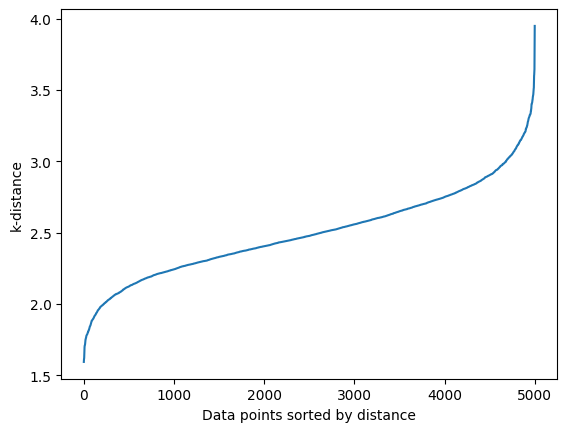

In [57]:
from sklearn.neighbors import NearestNeighbors


# Assume X is your dataset
neighbors = NearestNeighbors(n_neighbors=15)  # 55 is a starting point for min_samples
neighbors_fit = neighbors.fit(X2_scaled)
distances, indices = neighbors_fit.kneighbors(X2_scaled)

# Sort the distances of the 15th nearest neighbor (k-distance)
distances = np.sort(distances[:, 14])  # 14 because it's the k-th nearest (min_samples)
plt.plot(distances)
plt.ylabel('k-distance')
plt.xlabel('Data points sorted by distance')
plt.show()


In [58]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=2.8, min_samples=15)
dbscan.fit(X2_scaled)
dbscan_labels15 = dbscan.labels_

In [59]:
X3 = X2.copy()
X3['labels'] = dbscan_labels15
X3['labels'].unique()

array([ 0,  1, -1])

In [60]:
score = silhouette_score(X2_scaled, dbscan_labels15)
print("Silhouette Score: ", score)


Silhouette Score:  0.1741352036052531


In [61]:
dbscan = DBSCAN(eps=2.8, min_samples=16)
dbscan.fit(X2_scaled)
dbscan_labels16 = dbscan.labels_

In [62]:
X3 = X2.copy()
X3['labels'] = dbscan_labels16
X3['labels'].unique()

array([ 0,  1, -1])

In [63]:
score = silhouette_score(X2_scaled, dbscan_labels16)
print("Silhouette Score: ", score)


Silhouette Score:  0.17396788275825054


In [64]:
dbscan = DBSCAN(eps=2.8, min_samples=17)
dbscan.fit(X2_scaled)
dbscan_labels17 = dbscan.labels_

In [65]:
X3 = X2.copy()
X3['labels'] = dbscan_labels17
X3['labels'].unique()

array([ 0,  1, -1])

In [66]:
score = silhouette_score(X2_scaled, dbscan_labels17)
print("Silhouette Score: ", score)


Silhouette Score:  0.17473336999006095


### By trying different values of min samples we found that 17 has the highest score and increasing further will lower the score
- also we got 2 clusters just like the k-means model where 0,1 are the clusters and -1 is noise points

In [67]:
noise_XDB = X3.loc[X3['labels'] == -1]
noise_XDB

,merchant_id,burn_month,burn_day,transaction_day,city_id,gender_id,burn_year,join_day,customer_id,branch_id,transaction_status,join_year,join_month,transaction_year,transaction_month,labels
65,15,1,27,26,16,1,2023,11,371,4,1,2022,2,2022,12,-1
239,20,7,28,27,5,2,2022,24,970,8,1,2022,3,2022,5,-1
243,20,7,20,10,20,2,2022,1,145,8,1,2021,11,2022,5,-1
330,13,2,9,30,15,2,2022,17,962,10,1,2021,10,2021,12,-1
457,8,1,21,13,18,1,2023,22,859,3,1,2022,9,2022,12,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4749,7,1,25,19,3,1,2024,6,378,7,1,2023,3,2023,12,-1
4938,20,12,13,4,20,1,2022,23,337,8,1,2022,6,2022,12,-1
4939,8,1,17,2,11,1,2024,22,419,3,1,2023,6,2023,11,-1
4952,15,11,27,4,20,2,2023,1,145,6,1,2021,11,2023,9,-1


In [68]:
for colname in noise_XDB.columns:
    print(noise_XDB[colname].value_counts(),end = '\n-------------------------------------------------\n')

merchant_id
18    15
8     13
13    12
15    11
11    10
20     9
7      9
9      5
Name: count, dtype: int64
-------------------------------------------------
burn_month
1     41
2     13
12     9
3      7
11     6
7      2
5      2
10     2
4      1
9      1
Name: count, dtype: int64
-------------------------------------------------
burn_day
31    7
21    6
6     6
28    6
26    5
15    4
2     4
5     4
27    3
3     3
13    3
17    3
7     3
9     3
12    3
29    2
30    2
20    2
8     2
4     2
16    2
25    2
1     1
24    1
14    1
23    1
11    1
18    1
22    1
Name: count, dtype: int64
-------------------------------------------------
transaction_day
4     7
2     6
30    5
27    5
28    5
24    4
29    4
9     4
20    4
6     4
3     3
23    3
26    3
10    3
1     3
25    2
13    2
22    2
19    2
17    2
15    2
12    1
8     1
31    1
5     1
14    1
18    1
21    1
11    1
7     1
Name: count, dtype: int64
-------------------------------------------------
city_id
1     

In [69]:
XDB_1 = X3.loc[X3['labels'] == 1]
XDB_1

,merchant_id,burn_month,burn_day,transaction_day,city_id,gender_id,burn_year,join_day,customer_id,branch_id,transaction_status,join_year,join_month,transaction_year,transaction_month,labels
1,9,6,4,15,14,2,2023,10,631,5,1,2022,10,2023,5,1
4,15,11,20,12,14,1,2022,4,288,6,1,2021,9,2022,10,1
6,11,3,19,2,8,1,2024,27,812,1,1,2023,10,2024,3,1
7,15,7,17,23,3,1,2024,30,594,4,1,2024,1,2024,4,1
8,11,5,19,12,12,1,2023,13,966,1,1,2022,10,2023,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4983,13,1,29,21,12,1,2023,11,287,9,1,2022,3,2023,1,1
4986,20,10,31,3,13,1,2022,8,136,8,1,2022,1,2022,9,1
4989,20,7,2,18,17,2,2024,25,171,8,1,2023,3,2024,6,1
4997,18,12,6,8,10,2,2022,12,504,2,1,2022,3,2022,11,1


In [70]:
for colname in XDB_1.columns:
    print(XDB_1[colname].value_counts(),end = '\n-------------------------------------------------\n')

merchant_id
13    521
15    491
11    256
9     245
8     244
7     229
20    227
18    220
Name: count, dtype: int64
-------------------------------------------------
burn_month
7     335
8     308
6     280
5     235
4     206
9     196
3     193
2     156
10    150
12    142
11    119
1     113
Name: count, dtype: int64
-------------------------------------------------
burn_day
11    97
24    94
4     91
26    90
3     88
2     87
23    86
13    85
1     84
15    83
7     83
22    82
25    81
19    80
17    80
29    79
14    79
12    79
8     78
16    78
30    77
9     76
6     75
20    72
21    68
27    67
10    67
28    67
5     66
18    62
31    52
Name: count, dtype: int64
-------------------------------------------------
transaction_day
25    102
27     99
11     94
23     92
16     89
7      88
14     87
6      86
9      85
13     85
8      84
29     83
19     83
4      82
2      80
10     80
1      79
5      79
12     77
15     75
24     74
17     73
28     72
26     70
22   

In [71]:
XDB_0 = X3.loc[X3['labels'] == 0]
XDB_0

,merchant_id,burn_month,burn_day,transaction_day,city_id,gender_id,burn_year,join_day,customer_id,branch_id,transaction_status,join_year,join_month,transaction_year,transaction_month,labels
0,7,12,31,11,15,2,2099,16,733,7,0,2023,5,2024,5,0
2,7,12,31,13,2,1,2099,30,309,7,0,2022,5,2022,11,0
3,18,12,31,26,15,2,2099,27,695,2,0,2023,11,2024,1,0
5,20,12,31,1,2,1,2099,20,307,8,0,2021,12,2023,1,0
11,20,12,31,23,6,1,2099,4,662,8,0,2024,6,2024,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,20,12,31,13,11,1,2099,28,557,8,0,2022,8,2024,2,0
4994,8,12,31,29,15,2,2099,17,962,3,0,2021,10,2023,3,0
4995,11,12,31,20,12,1,2099,8,776,1,0,2022,1,2024,3,0
4996,18,12,31,27,5,2,2099,3,583,2,0,2023,8,2024,6,0


In [72]:
for colname in XDB_0.columns:
    print(XDB_0[colname].value_counts(),end = '\n-------------------------------------------------\n')

merchant_id
13    499
15    499
11    261
20    260
7     258
9     239
18    237
8     230
Name: count, dtype: int64
-------------------------------------------------
burn_month
12    2483
Name: count, dtype: int64
-------------------------------------------------
burn_day
31    2483
Name: count, dtype: int64
-------------------------------------------------
transaction_day
13    100
29     97
1      96
9      95
10     95
25     92
12     90
11     89
3      88
27     87
7      86
22     83
26     83
28     82
4      82
14     82
2      81
5      80
20     79
23     78
18     77
6      77
8      77
30     76
15     76
24     73
21     72
19     65
17     56
16     55
31     34
Name: count, dtype: int64
-------------------------------------------------
city_id
1     182
19    144
15    143
5     140
3     139
17    137
12    137
4     132
8     130
6     121
11    120
2     120
10    116
16    109
9     108
20    108
14    105
13    105
7     104
18     83
Name: count, dtype: int64
--

# investigating DBSCAN clusters
same as K-means clusters there are 2 clusters one for each transaction_status and all other information about the 2 clusters are the same the only difference is that a 81 rows are considered noise manly from the burn status

# Hierarchical Clustering

In [90]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


# Perform Agglomerative Clustering
clustering = AgglomerativeClustering(n_clusters=2)
y_pred = clustering.fit_predict(X2_scaled)

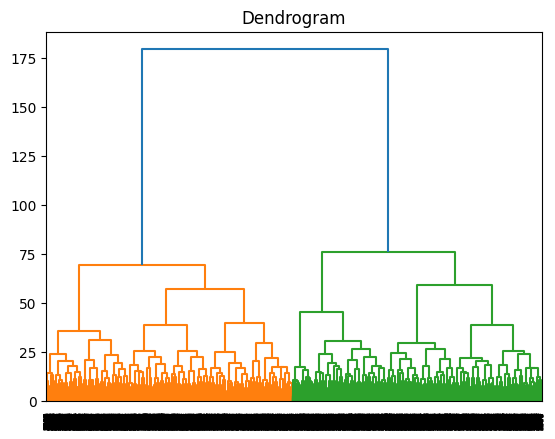

In [81]:
# Plot the dendrogram

Z = linkage(X2_scaled, 'ward')

plt.figure()
dendrogram(Z)
plt.title('Dendrogram')
plt.show()


In [91]:
score = silhouette_score(X2_scaled, y_pred)
print("Silhouette Score: ", score)


Silhouette Score:  0.20340340200749962


since we plot the dendogram to determine what's the best number of clusters to use and it is the value when there is a huge leap between merges and this is the case when merging the 2 clusters into a whole cluster so we go with n of clusters = 2 and it will give the highest silhouette score 

In [92]:
X_Hierarchical = X2.copy()
X_Hierarchical['labels'] = y_pred
X_Hierarchical

,merchant_id,burn_month,burn_day,transaction_day,city_id,gender_id,burn_year,join_day,customer_id,branch_id,transaction_status,join_year,join_month,transaction_year,transaction_month,labels
0,7,12,31,11,15,2,2099,16,733,7,0,2023,5,2024,5,1
1,9,6,4,15,14,2,2023,10,631,5,1,2022,10,2023,5,0
2,7,12,31,13,2,1,2099,30,309,7,0,2022,5,2022,11,1
3,18,12,31,26,15,2,2099,27,695,2,0,2023,11,2024,1,1
4,15,11,20,12,14,1,2022,4,288,6,1,2021,9,2022,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,11,12,31,20,12,1,2099,8,776,1,0,2022,1,2024,3,1
4996,18,12,31,27,5,2,2099,3,583,2,0,2023,8,2024,6,1
4997,18,12,6,8,10,2,2022,12,504,2,1,2022,3,2022,11,0
4998,7,7,29,5,5,2,2024,19,876,7,1,2022,11,2024,5,0


In [94]:
XH_0 = X_Hierarchical.loc[X_Hierarchical['labels'] == 0]
XH_0['transaction_status'].value_counts()

transaction_status
1    2516
Name: count, dtype: int64

In [95]:
XH_1 = X_Hierarchical.loc[X_Hierarchical['labels'] == 1]
XH_1['transaction_status'].value_counts()

transaction_status
0    2484
Name: count, dtype: int64

# All clustering techniques has clustered the data into quite the same 2 clusters ensuring that our data is indeed seperable into 2 clusters based on the transaction_status purely

# Dimensionality Reduction
- we need to plot the culative explained variance againest the number of components after reduction to know how much variance(information) is captured of the whole data based on each number of reduced components

In [96]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
pca.fit(X2_scaled)

# Get the explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_
# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)


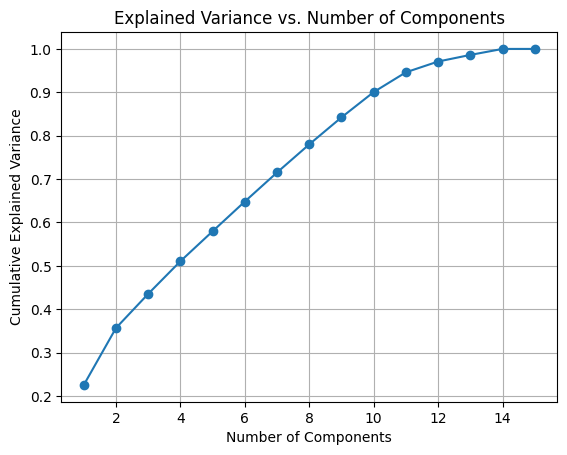

In [97]:
import matplotlib.pyplot as plt

plt.plot(np.arange(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid()
plt.show()


to retain 90% - 85% of the information we need to reduce to 10-9 components only as if we reduce further we are losing more information

In [112]:
pca = PCA(n_components=10)
X_reduced10 = pca.fit_transform(X2_scaled)

In [113]:
pca = PCA(n_components=9)
X_reduced9 = pca.fit_transform(X2_scaled)

## K-Means --> 2 clusters

In [128]:
# K = 2
kmeans_2 = KMeans(n_clusters = 2)

# Fit the model to the data
kmeans_2.fit(X_reduced10)

# Get the cluster centers (centroids)
centroids = kmeans_2.cluster_centers_

# Get the predicted clusters for each data point
ymeans_2 = kmeans_2.predict(X_reduced10)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [129]:
score = silhouette_score(X_reduced10,kmeans_2.labels_)
print("Silhouette Score: ", score)


Silhouette Score:  0.22372148428907385


In [130]:
from sklearn.metrics import davies_bouldin_score
dbi = davies_bouldin_score(X_reduced10, kmeans_2.labels_)
print("Davies-Bouldin Index: ", dbi)

Davies-Bouldin Index:  1.7690027781252027


In [125]:
# K = 2
kmeans_2 = KMeans(n_clusters = 2)

# Fit the model to the data
kmeans_2.fit(X_reduced9)

# Get the cluster centers (centroids)
centroids = kmeans_2.cluster_centers_

# Get the predicted clusters for each data point
ymeans_2 = kmeans_2.predict(X_reduced9)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [126]:
score = silhouette_score(X_reduced9,ymeans_2)
print("Silhouette Score: ", score)


Silhouette Score:  0.2392010273671513


In [127]:
from sklearn.metrics import davies_bouldin_score
dbi = davies_bouldin_score(X_reduced9, kmeans_2.labels_)
print("Davies-Bouldin Index: ", dbi)

Davies-Bouldin Index:  1.6875011856407436


In [173]:
pca = PCA(n_components=2)
X_reduced5 = pca.fit_transform(X2_scaled)

In [174]:
# K = 2
kmeans_2 = KMeans(n_clusters = 2)

# Fit the model to the data
kmeans_2.fit(X_reduced5)

# Get the cluster centers (centroids)
centroids = kmeans_2.cluster_centers_

# Get the predicted clusters for each data point
ymeans_2 = kmeans_2.predict(X_reduced5)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [175]:
score = silhouette_score(X_reduced5,ymeans_2)
print("Silhouette Score: ", score)


Silhouette Score:  0.5749196567621723


## We can notice that reducing the components will result in higher results but this is only because we are losing more information so the data gets easier to be clustered at the cost of this lost information, so we will stick to 9 components and lose only 15% of the data as we don't know losing more info might reduce the model's inference abilty as it might be important info that we lost by reducing components further 

## DBSCAN

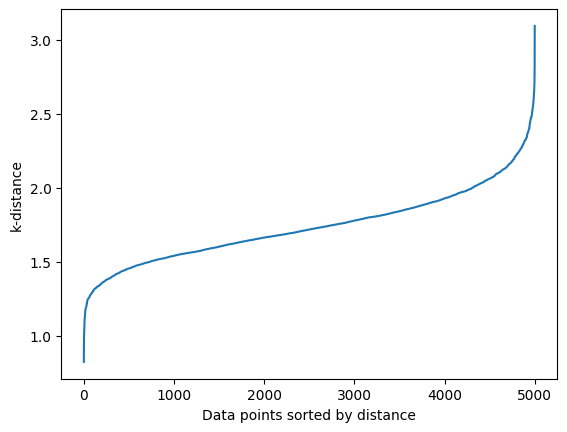

In [131]:
from sklearn.neighbors import NearestNeighbors


# Assume X is your dataset
neighbors = NearestNeighbors(n_neighbors=9)  # 9 is a starting point for min_samples
neighbors_fit = neighbors.fit(X_reduced9)
distances, indices = neighbors_fit.kneighbors(X_reduced9)

# Sort the distances of the 9th nearest neighbor (k-distance)
distances = np.sort(distances[:, 8])  # 8 because it's the k-th nearest (min_samples)
plt.plot(distances)
plt.ylabel('k-distance')
plt.xlabel('Data points sorted by distance')
plt.show()


In [161]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=2.2, min_samples=9)
dbscan.fit(X_reduced9)
dbscan_labels9 = dbscan.labels_

In [162]:
score = silhouette_score(X_reduced9,dbscan_labels9)
print("Silhouette Score: ", score)


Silhouette Score:  0.20655224198275982


## Hierarchical Clustering

In [164]:
clustering = AgglomerativeClustering(n_clusters=2)
y_pred9 = clustering.fit_predict(X_reduced9)

In [165]:
score = silhouette_score(X_reduced9,y_pred9)
print("Silhouette Score: ", score)


Silhouette Score:  0.2392010273671513


# Dim Reduction Results using silhouette score:
K-means = 0.2392              | without reduction --> 0.2034

DBSCAN = 0.2065              | without reduction -->  0.1741

Hierarchical Clustering = 0.2392    | without reduction --> 0.2034

so Dim reduction enhances model's scores

# Segments Recommendation:
- as all clustering techniques provided nearly the same 2 clusters, based on what said in investigation k-means clusters cluster0(customers used thier coupons) should be prioritized in issuing coupons to them as they are fast consumers that needed by the merchants to help make them loyal and satisfied with the merchant's store to maximize the benefits from this segment